# **Exploratory Data Analysis (EDA) of Used Cars Dataset**

#  1. Introduction

This notebook performs Exploratory Data Analysis (EDA) on a dataset containing used car details. The goal is to understand the data, clean it, handle missing values, and extract useful insights.


# 2. Loading Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# 3. Loading the Dataset

In [13]:
data = pd.read_csv("used_cars_data.csv")

# 4. Initial Exploration

In [14]:
#first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [15]:
#last 5 rows
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [16]:
#shape of the dataset
data.shape

(7253, 14)

In [17]:
#Displays data types and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [18]:
#Counts unique values per column
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [19]:
# Identifying duplicate values
data.duplicated().sum()

0

In [20]:
#Identifies missing values
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [21]:
#missing values in columns
(data.isnull().sum()/(len(data)))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


#5. Handling Missing Data

In [22]:
data['Mileage'] = data['Mileage'].str.extract(r'(\d+\.\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract(r'(\d+)').astype(float)
data['Power'] = data['Power'].str.extract(r'(\d+\.\d+)').astype(float)

In [23]:
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
data['Engine'].fillna(data['Engine'].median(), inplace=True)
data['Power'].fillna(data['Power'].median(), inplace=True)
data['Seats'].fillna(data['Seats'].mode()[0], inplace=True)

In [24]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.drop(columns=['New_Price'], inplace=True)  # Dropping due to excessive missing values
data.dropna(subset=['Price'], inplace=True)  # Dropping rows where price is missing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


# **6. Feature Engineering**

# Creating New Features

In [25]:
date.today().year
data['Car_Age']=date.today().year-data['Year']#Extracts Car_Age from Year.
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)#Extracts Brand and Model from the Name column

In [26]:
data[['Name','Brand','Model','Car_Age']]

,Name,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6,10
2,Honda Jazz V,Honda,JazzV,14
3,Maruti Ertiga VDI,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New,12
...,...,...,...,...
6014,Maruti Swift VDI,Maruti,SwiftVDI,11
6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent1.1,10
6016,Mahindra Xylo D4 BSIV,Mahindra,XyloD4,13
6017,Maruti Wagon R VXI,Maruti,WagonR,12


#Standardizing Brand Names

In [27]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
31


In [28]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']  #Ensures consistent brand naming
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,11,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,88.80,5.0,17.50,13,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,88.80,5.0,23.00,8,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,55.76,7,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,35.67,8,Mini,CooperConvertible


In [29]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

# **7. Statistical Summary**

In [30]:
data.describe().T #Provides statistical summaries of numerical and categorical features

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.0,18.134969,4.581528,0.00,15.17,18.16,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.0,99.746257,37.666214,34.20,86.80,88.80,100.60,488.10
Seats,6019.0,5.276790,0.806346,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00
Car_Age,6019.0,11.641801,3.269742,6.00,9.00,11.00,14.00,27.00


In [31]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.134969,4.581528,0.0,15.17,18.16,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.509221,599.635458,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,99.746257,37.666214,34.2,86.8,88.8,100.6,488.1


# separating numeric and categorical columns

In [32]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


# **8. Identifying Outliers**

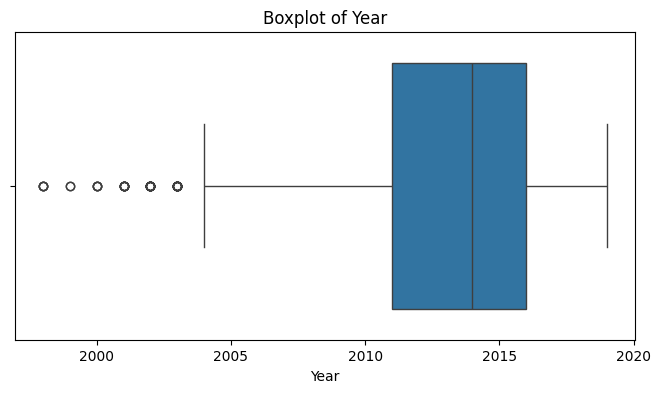

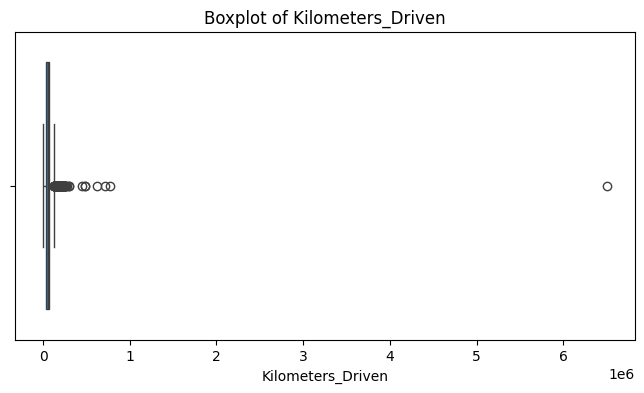

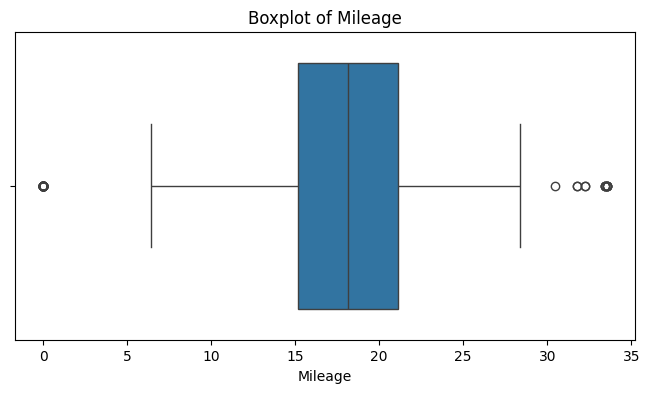

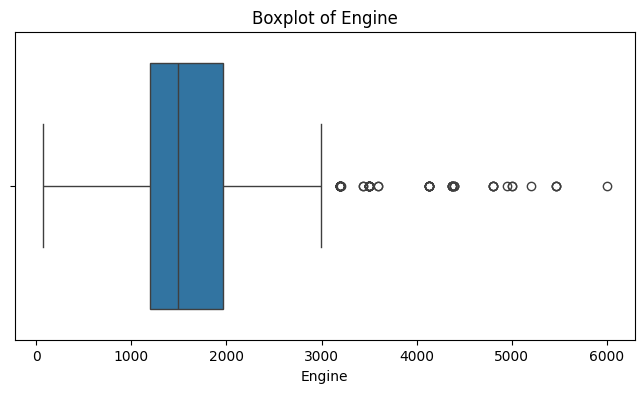

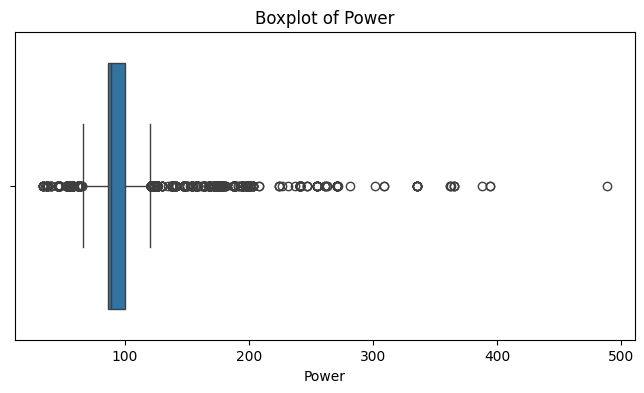

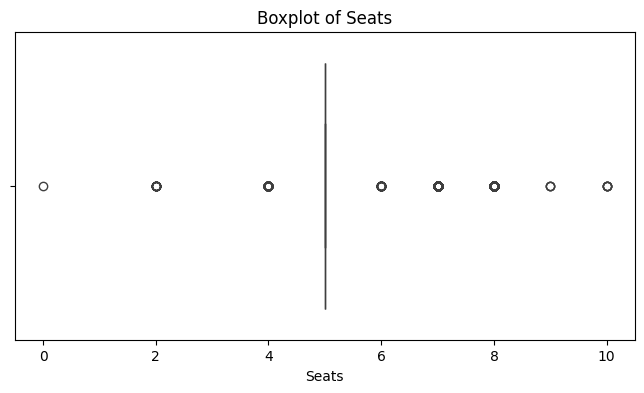

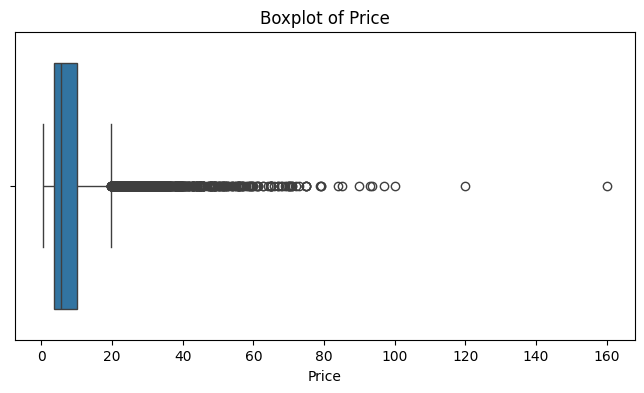

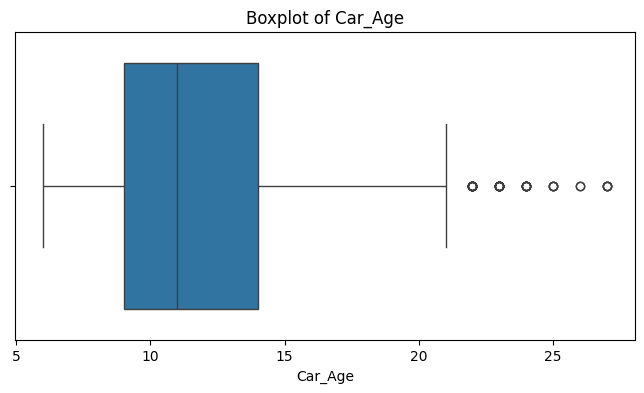

In [33]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#Outlier Removal using IQR

In [34]:
# Outlier Detection using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [35]:
outlier_columns = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
for col in outlier_columns:
    data = remove_outliers(data, col)

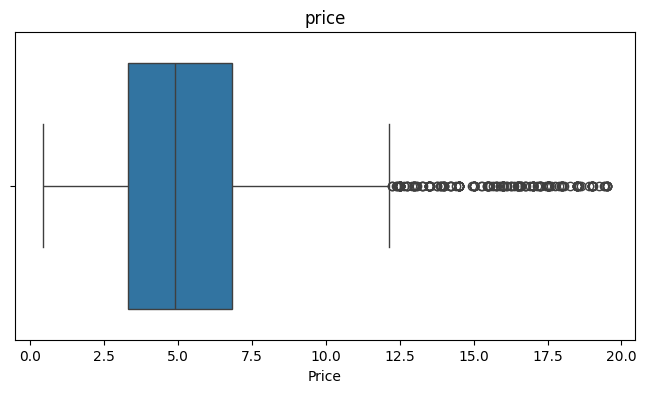

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Price']) # Corrected indentation and using data['Price']
plt.title('price')
plt.show()

# **9. Data Visualization**

# Skewness Check

Feature: Year, Skewness: -0.88
Feature: Kilometers_Driven, Skewness: 0.43


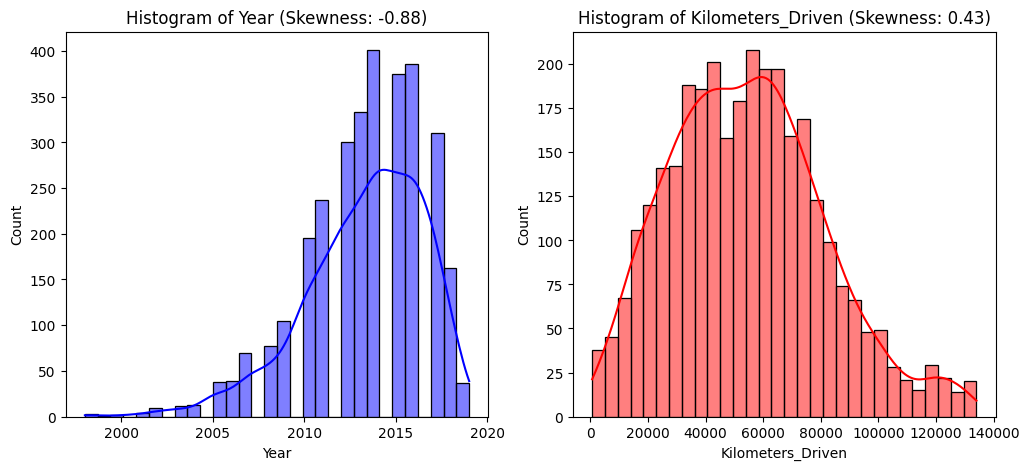

Feature: Mileage, Skewness: 0.28
Feature: Engine, Skewness: 1.29


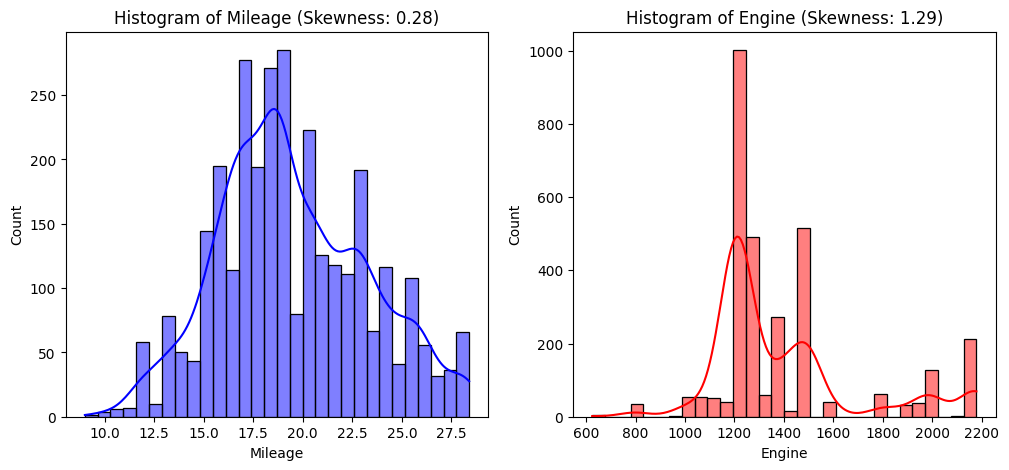

Feature: Power, Skewness: -0.65
Feature: Seats, Skewness: 2.8


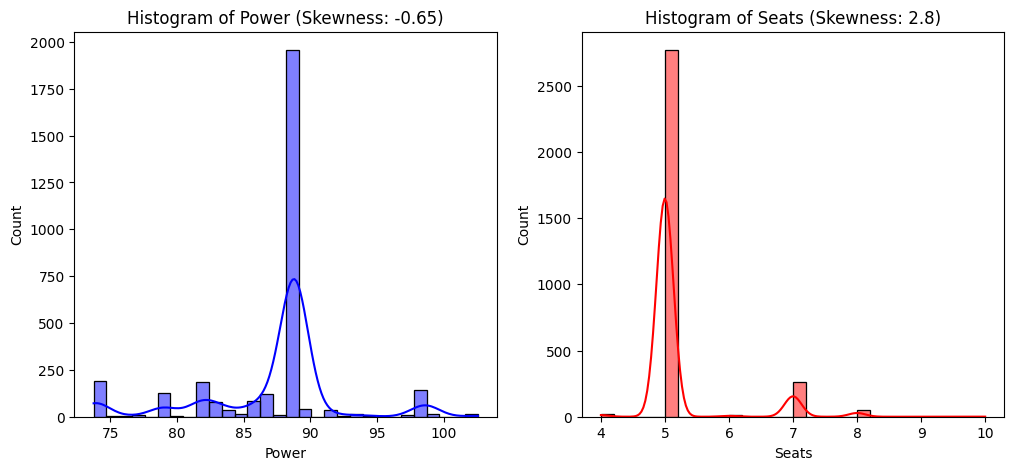

Feature: Price, Skewness: 1.64
Feature: Car_Age, Skewness: 0.88


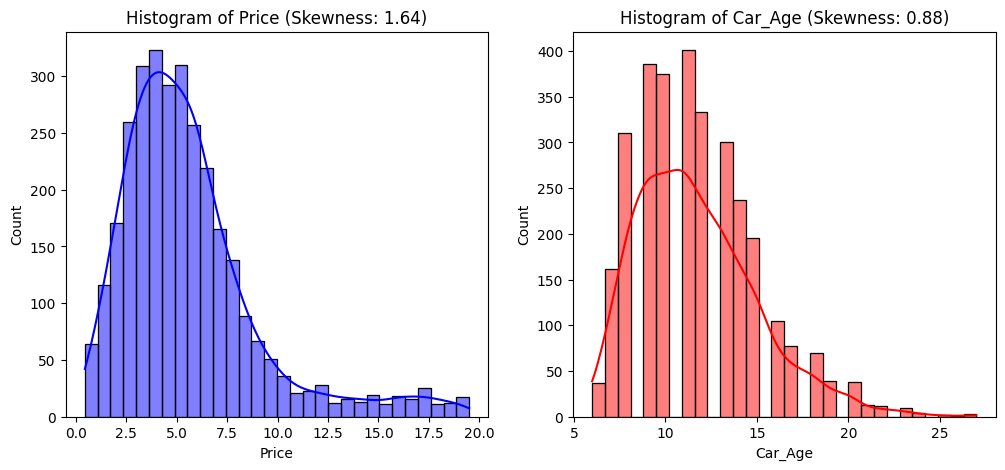

In [37]:
# Check skewness for numerical features
if len(num_cols) % 2 != 0:
    num_cols = num_cols[:-1]

for i in range(0, len(num_cols), 2):
    col1, col2 = num_cols[i], num_cols[i + 1]
    skew1 = round(data[col1].skew(), 2)
    skew2 = round(data[col2].skew(), 2)
    print(f"Feature: {col1}, Skewness: {skew1}")
    print(f"Feature: {col2}, Skewness: {skew2}")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data[col1], bins=30, kde=True, color='blue', ax=axes[0])
    axes[0].set_title(f'Histogram of {col1} (Skewness: {skew1})')
    sns.histplot(data[col2], bins=30, kde=True, color='red', ax=axes[1])
    axes[1].set_title(f'Histogram of {col2} (Skewness: {skew2})')
    plt.show()


# Log Transformation

In [38]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [39]:
log_transform(data,['Price','Kilometers_Driven'])

<class 'pandas.core.frame.DataFrame'>
Index: 3109 entries, 2 to 6015
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   3109 non-null   object 
 1   Location               3109 non-null   object 
 2   Year                   3109 non-null   int64  
 3   Kilometers_Driven      3109 non-null   int64  
 4   Fuel_Type              3109 non-null   object 
 5   Transmission           3109 non-null   object 
 6   Owner_Type             3109 non-null   object 
 7   Mileage                3109 non-null   float64
 8   Engine                 3109 non-null   float64
 9   Power                  3109 non-null   float64
 10  Seats                  3109 non-null   float64
 11  Price                  3109 non-null   float64
 12  Car_Age                3109 non-null   int64  
 13  Brand                  3109 non-null   object 
 14  Model                  3109 non-null   object 
 15  Price_log

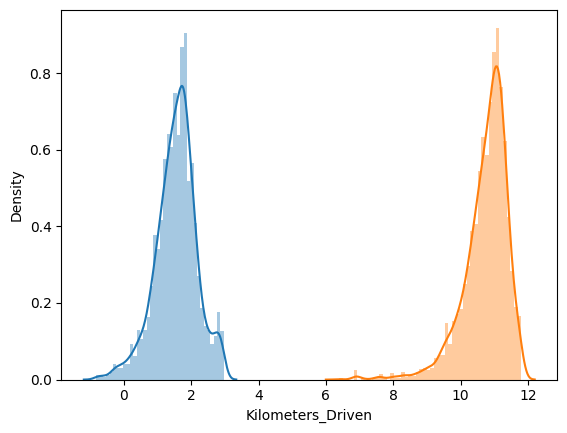

In [40]:
#Applies log transformation to Price for better normality.
sns.distplot(data["Price_log"], axlabel="Price");
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven");

# Categorical Data Visualization

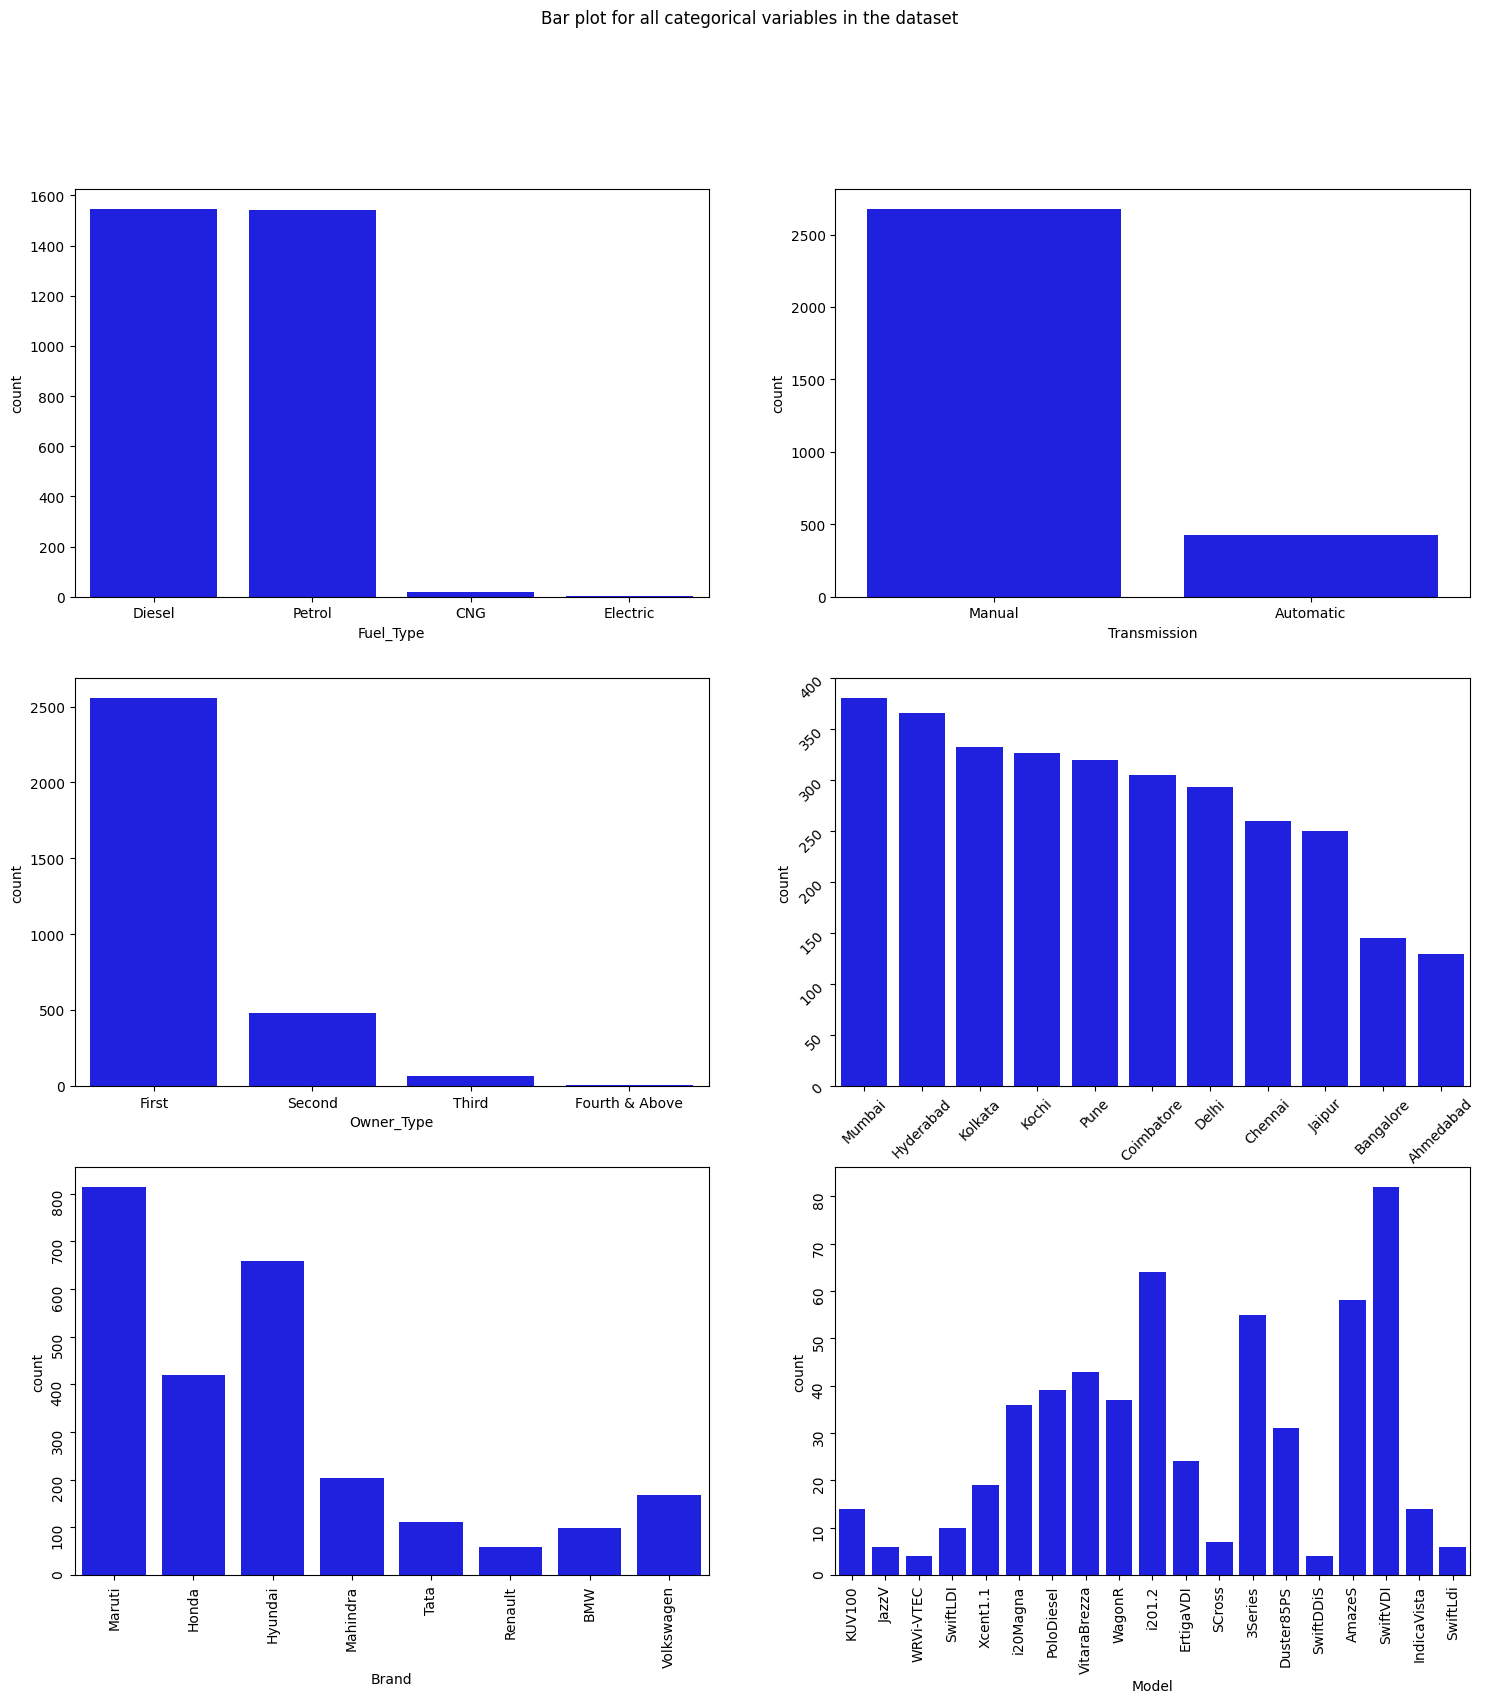

In [41]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# pairplot for numeric features

<Figure size 1300x1700 with 0 Axes>

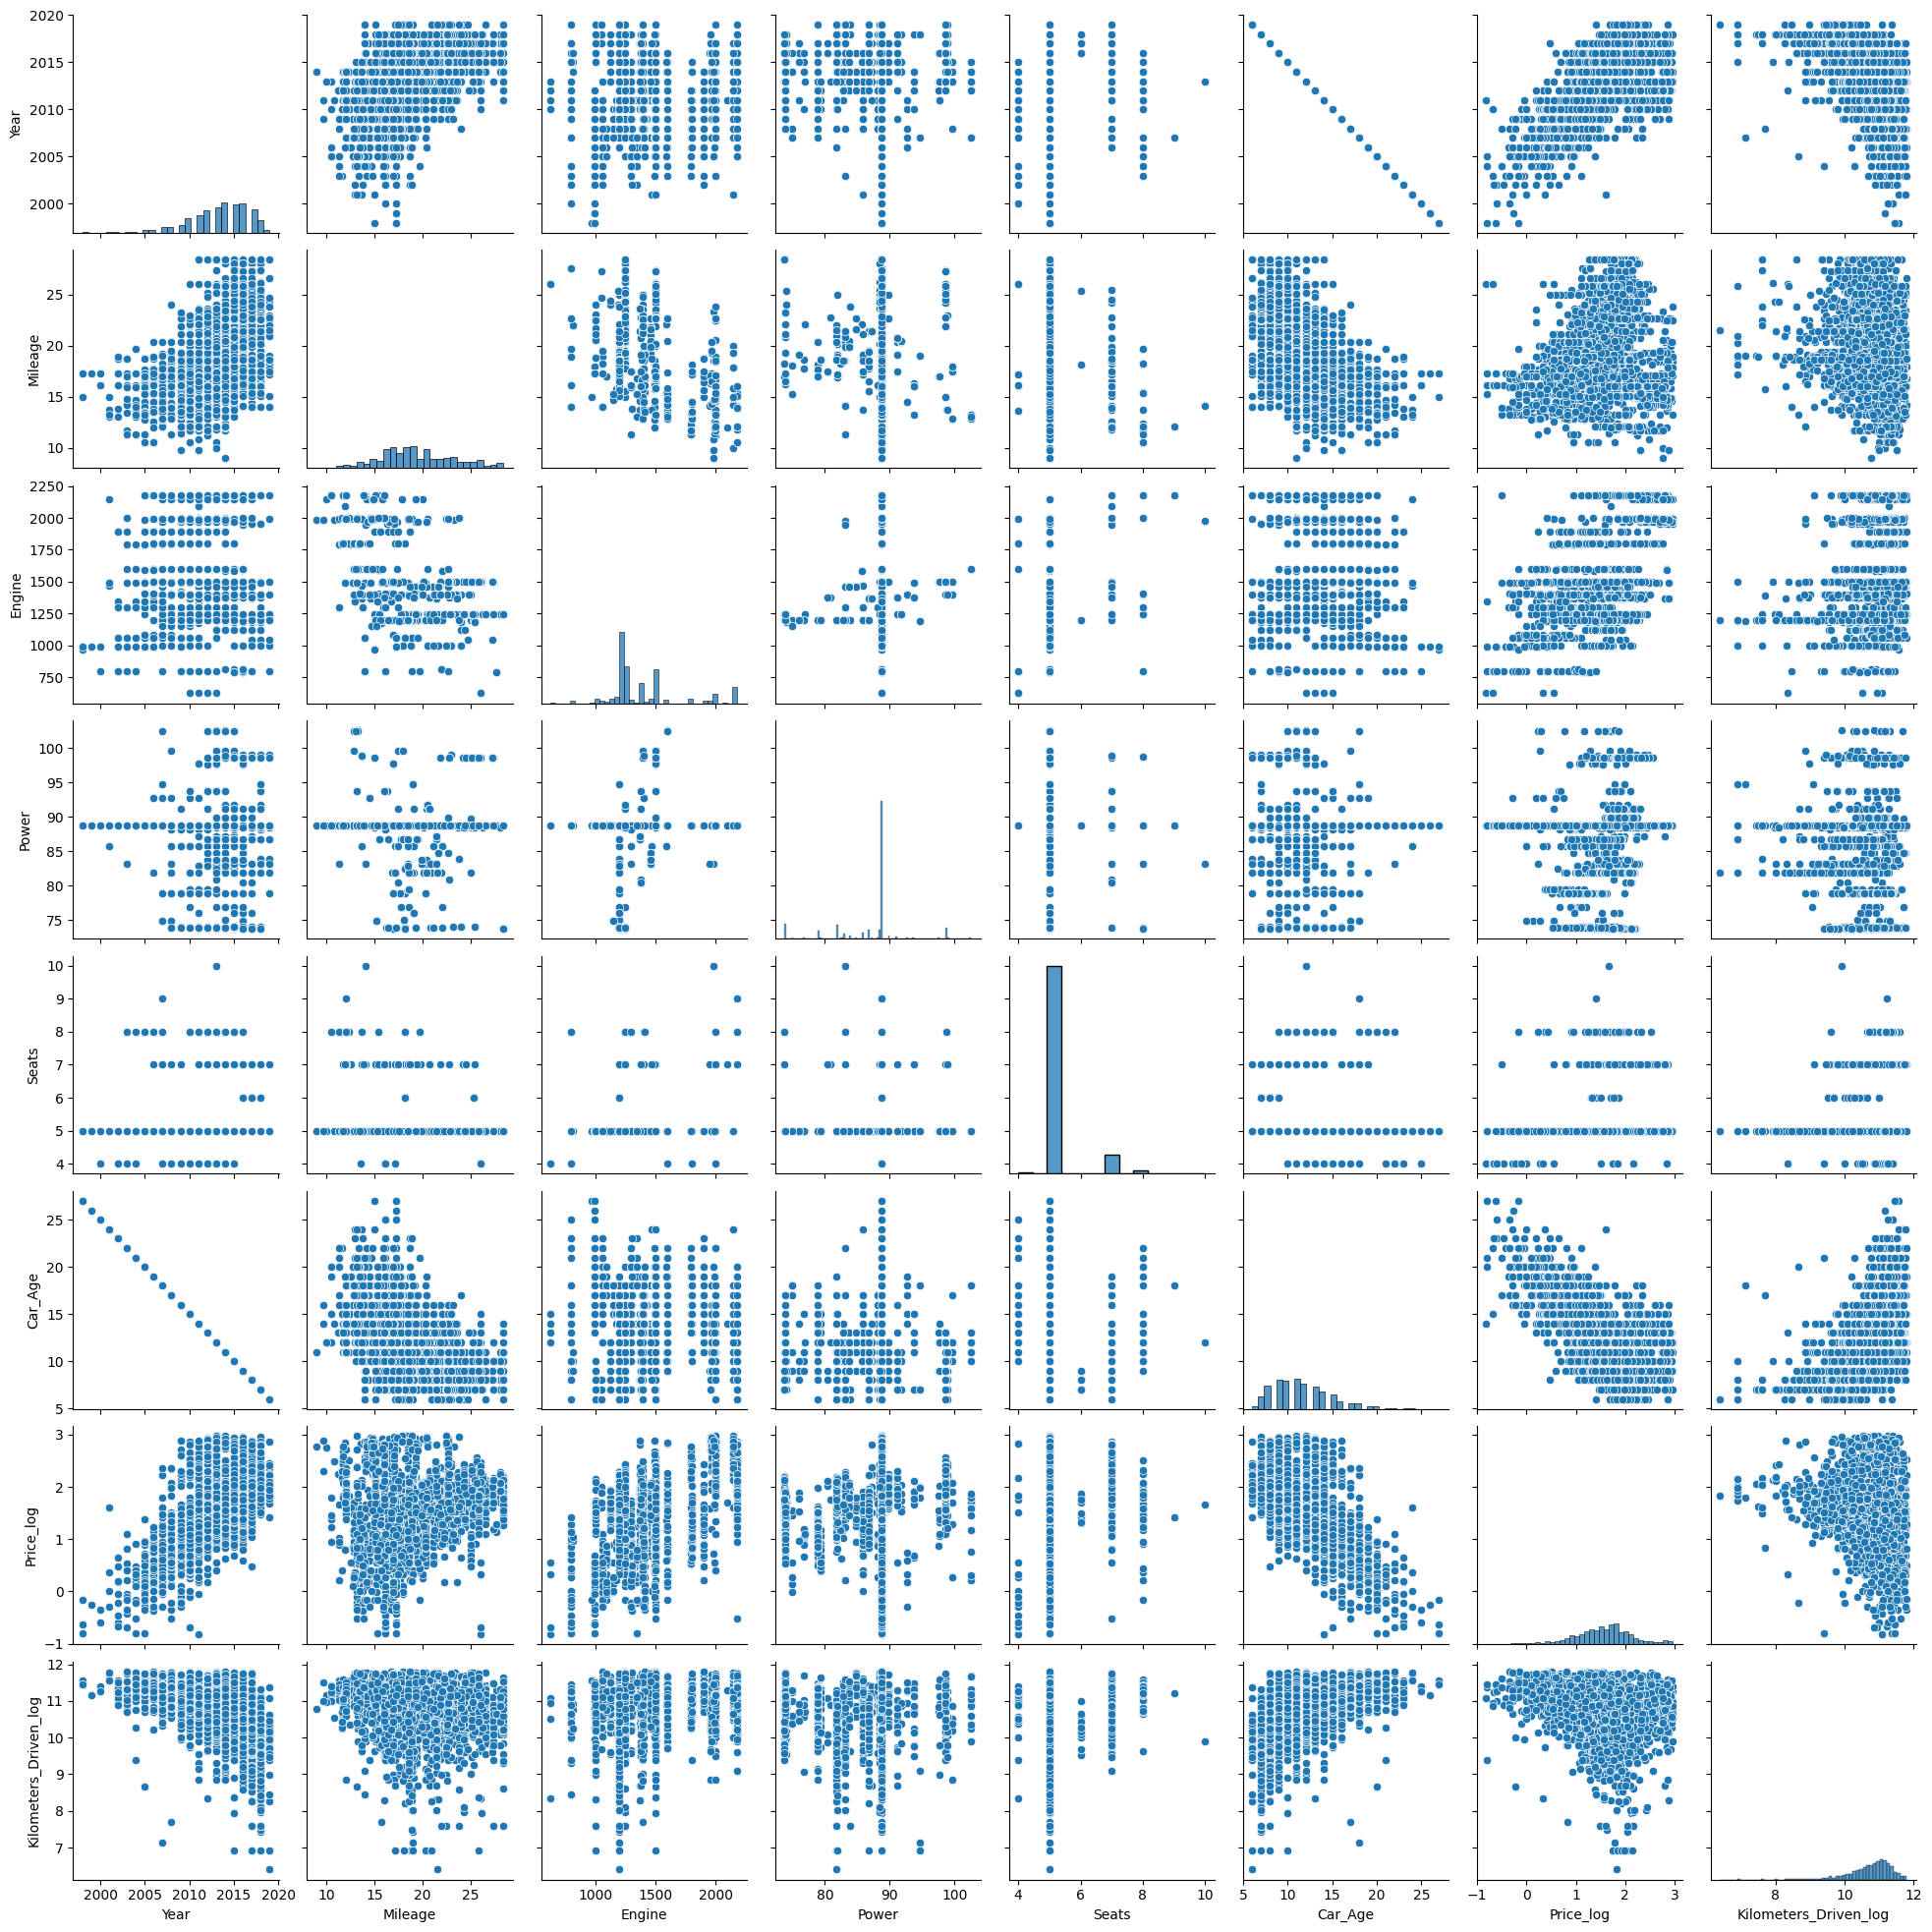

In [42]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

# categorical features vs Price

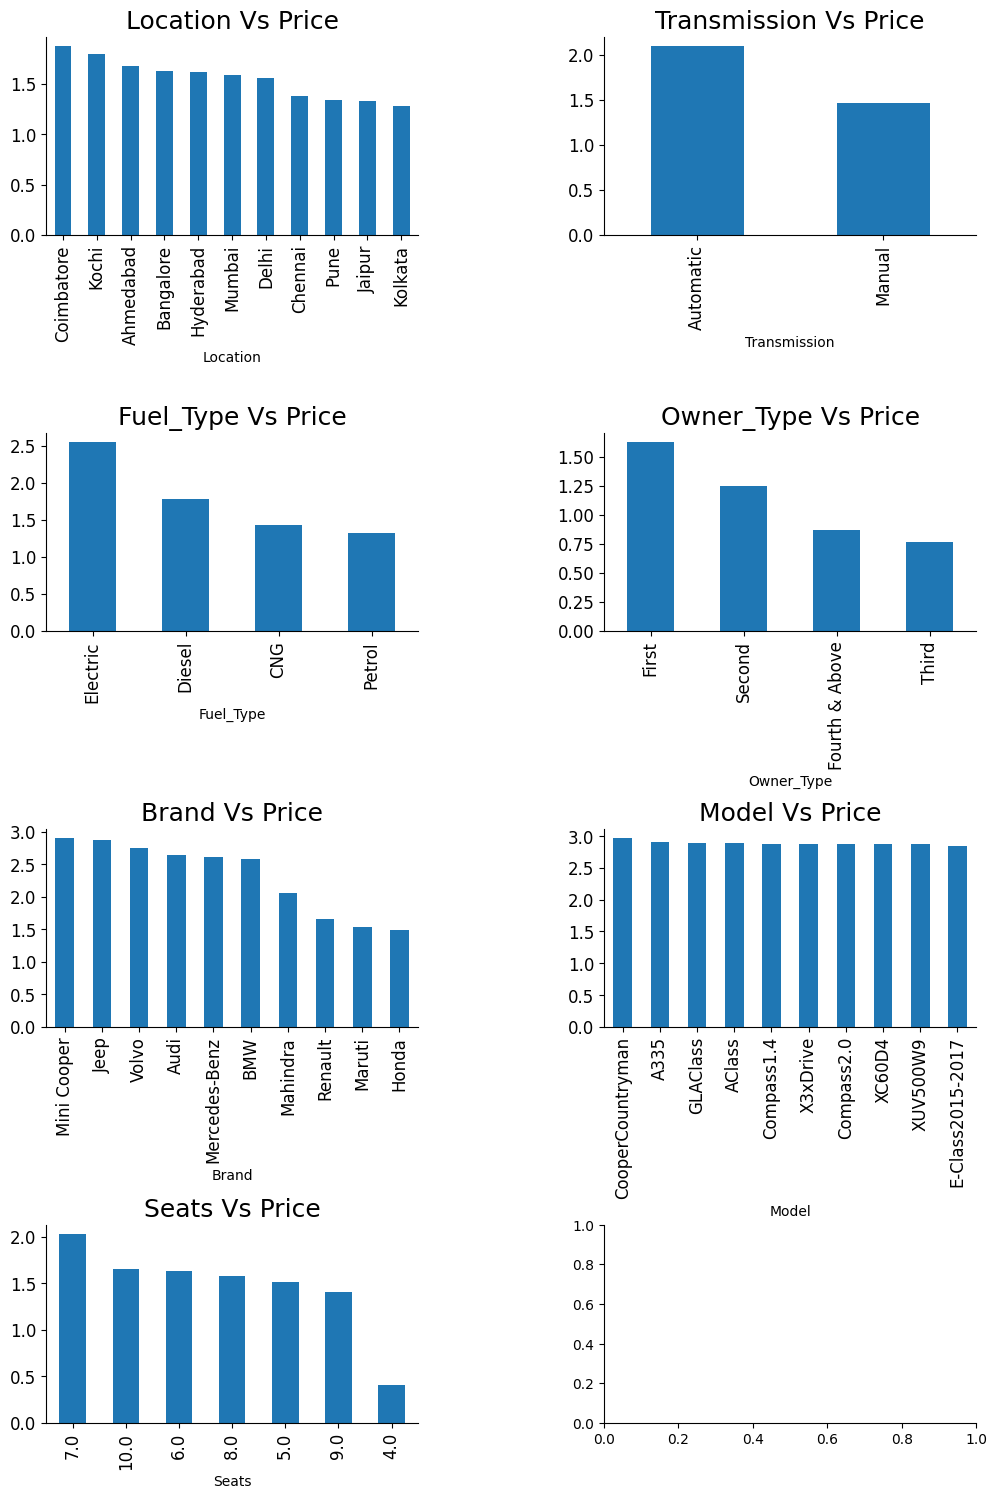

In [43]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

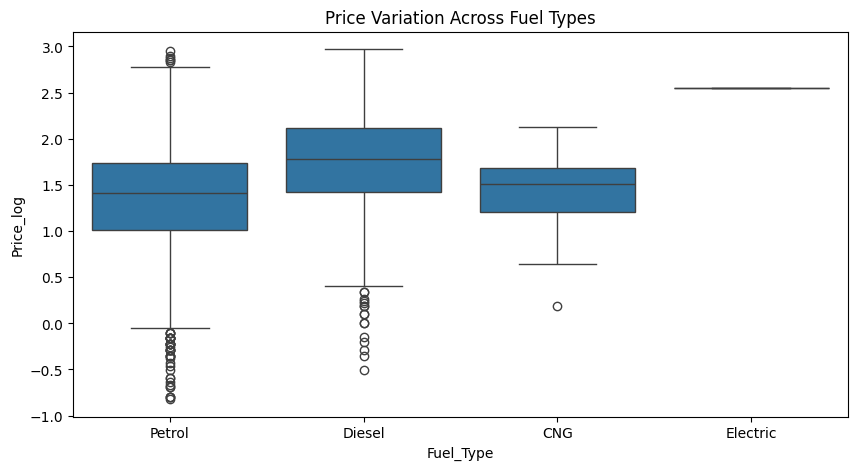

In [44]:
#Price vs Fuel Types
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fuel_Type', y='Price_log', data=data)
plt.title('Price Variation Across Fuel Types')
plt.show()

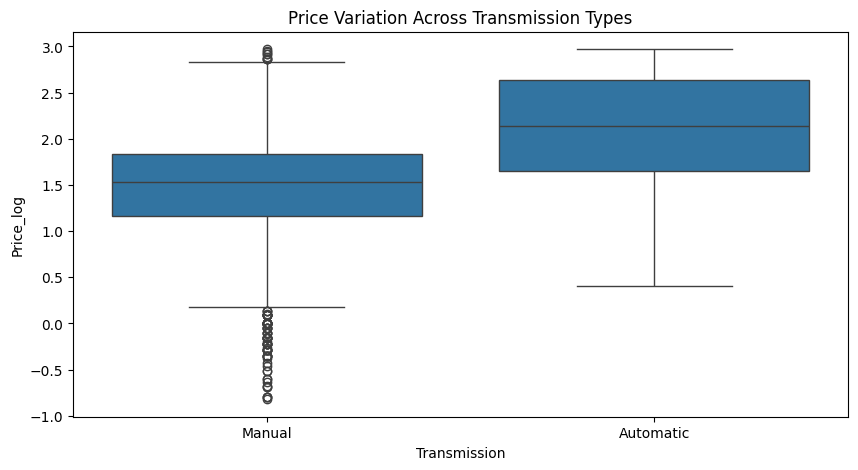

In [45]:
# Transmission vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='Transmission', y='Price_log', data=data)
plt.title('Price Variation Across Transmission Types')
plt.show()

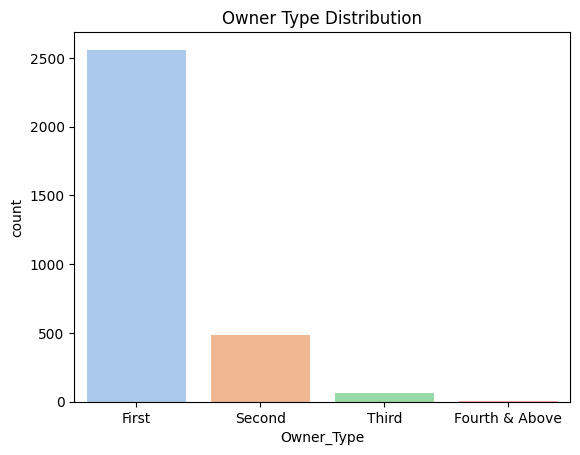

In [46]:
# Owner Type Analysis
sns.countplot(x='Owner_Type', data=data, palette='pastel')
plt.title('Owner Type Distribution')
plt.show()

# Correlation Analysis

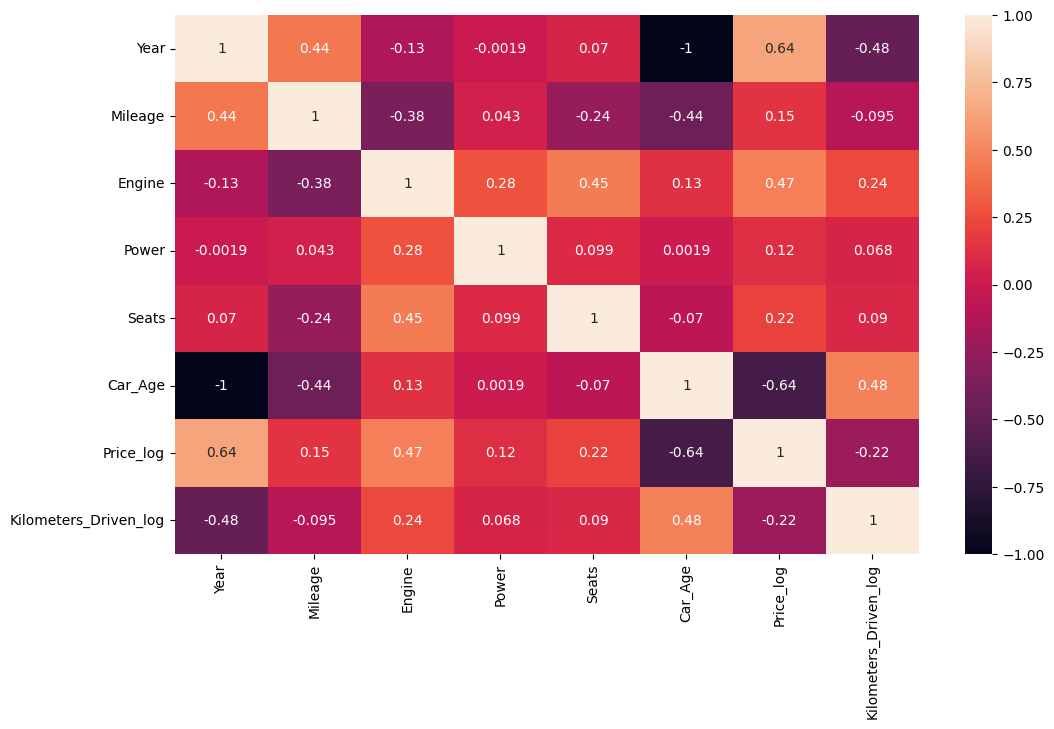

In [47]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven',  'Price'],axis=1).corr(numeric_only=True), annot = True, vmin = -1, vmax = 1)
plt.show()

# **10. Key Findings**

#1.Missing Values: Mileage, Engine, Power, and Seats had missing values, which were handled appropriately.

#2. Feature Engineering: Extracted Car_Age, Brand, and Model from existing data.

#3. Outliers: Removed extreme values from Price, Kilometers_Driven, and other numerical features.

#4. Distribution Analysis:

   #For skewed distributiontion  applied log transformation.
   
   #Most of the people prefer first hand ownership

   #manual cars are more prefered over other type

   #electric cars price is compared to other types  

   #Fuel_Type, Transmission, and Owner_Type impact Price significantly.

#5. Correlation:

Engine and Power have a strong positive correlation.

Car_Age negatively impacts Price (older cars are cheaper).



# **11. Conclusion**

# This EDA provided valuable insights into the dataset, cleaned the data, handled missing values, and performed essential feature engineering. The next steps could involve predictive modeling for price estimation or further exploratory analysis on brand-wise car pricing trends.